In [14]:
import math
import pickle
import networkx as nx

In [15]:
objects = []
with (open("pipeline/lcsdive/exp5/output/lcs_dive/Composite/rulepop/networkpickle", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [16]:
obj = objects[0]

In [17]:
(acc_spec_dict, edge_list, weight_list, pos) = obj

In [18]:
G = nx.Graph()
for i in range(len(edge_list)):
    G.add_edge(edge_list[i][0], edge_list[i][1], weight=weight_list[i])
pos = nx.spring_layout(G, k=1)

{'N26': Text(-0.19087887821822627, -0.052923156646992764, 'N26'),
 'N70': Text(-0.016064655913625558, -0.10006401318384193, 'N70'),
 'N68': Text(-0.07174874954540639, 0.06368381056339442, 'N68'),
 'N71': Text(-0.19152963136907333, 0.13059794123762347, 'N71'),
 'N72': Text(-0.15631939144693635, 0.16790686076851674, 'N72'),
 'N79': Text(-0.18575954318600818, 0.015847159380360756, 'N79'),
 'N30': Text(-0.03987819734167621, -0.01251682576985766, 'N30'),
 'N54': Text(0.13114973077865874, -0.20742615312195126, 'N54'),
 'N75': Text(0.054580431400464015, -0.13377677662609458, 'N75'),
 'N44': Text(0.15889548774287052, 0.01738551339403066, 'N44'),
 'N62': Text(0.19359692192928193, -0.3788697740311157, 'N62'),
 'N46': Text(0.3065377904688078, 0.13045589490878912, 'N46'),
 'N53': Text(-0.059338797920729755, 0.37636137729967967, 'N53'),
 'N61': Text(0.11611869853724426, -0.3153720610993959, 'N61'),
 'N18': Text(0.17835275195126854, -0.22809349287079184, 'N18'),
 'N49': Text(-0.09235635216352887, -0

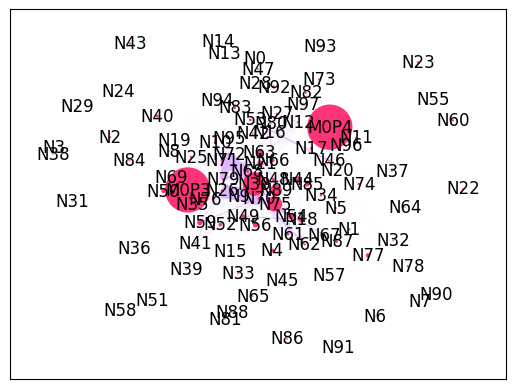

In [19]:
max_node_value = max(acc_spec_dict.values())
for i in acc_spec_dict:
    acc_spec_dict[i] = math.pow(acc_spec_dict[i] / max_node_value, 3) * 1000  # Cubic Node Size Function

max_weight_value = max(weight_list)
for i in range(len(weight_list)):
    weight_list[i] = math.pow(weight_list[i] / max_weight_value, 3) * 10  # Cubic Weight Function

nx.draw_networkx_nodes(G, pos=pos, nodelist=acc_spec_dict.keys(), node_size=[v * 1 for v in acc_spec_dict.values()], node_color='#FF3377')
nx.draw_networkx_edges(G, pos=pos, edge_color='#E0B8FF', edgelist=edge_list, width=[v * 1 for v in weight_list])
nx.draw_networkx_labels(G, pos=pos)

In [20]:
nx.write_gexf(G, 'output/Figure6.gexf')